Notes:  
Verificar normalização em get_signal_list()  
https://librosa.github.io/librosa/generated/librosa.util.normalize.html

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from utils import *
from pathlib import Path
import h5py
import matplotlib.pyplot as plt

## Dataset setup and setup testing.

In [5]:
(np_filename_list, bool_label_list, one_hot_labels, spec_flatten_list, etc, signal_list, splitted_file_list) = setup_dataset(csv_path='instruments.csv',
             dataset_path='dataset',
             splitted_dataset_path='splitted_dataset',
             chunk_length=2,
             sr=16000)

100%|██████████| 206/206 [00:16<00:00, 12.29it/s]


------
TESTING:
Splitted dataset:
framerate: 16000Hz (all files has the same framerate)
File length (seconds): 2.0s (all files has the same length)
Total dataset length (seconds): 412.0s

Original dataset:
framerate: 44100Hz (all files has the same length)
------
Your dataset is ready! :D
------
Output:
File name list(numpy.string_)
Label list (boolean)
Label Numpy xxx  
------


In [15]:
name_lst, label_lst, one_hot_lst, spec_flatten_lst, sample_rate, shape = read_hdf5()

In [112]:
with h5py.File("dataset.hdf5","r") as hdf:
    name_lst_enc = np.array(hdf['/Dataset/file_names'])
    label_lst = np.array(hdf['Dataset/bool_labels'])
    one_hot_lst_enc = np.array(hdf['Dataset/one_hot_labels'])
    signal = np.array(hdf['Dataset/signal'])

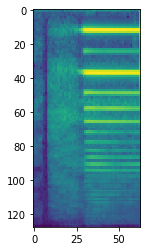

In [19]:
idx = 6
plt.imshow(spec_flatten_lst[idx].reshape(shape), interpolation='nearest')